In [1]:
from matplotlib import pyplot as pb

import numpy as np
import GPy

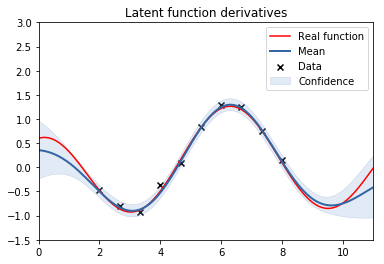

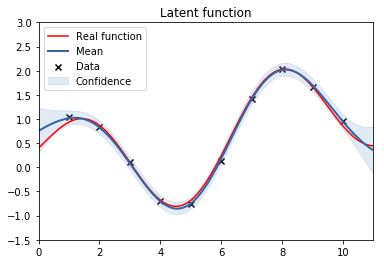

In [2]:
def plot_gp_vs_real(m, x, yreal, size_inputs, title, fixed_input=1, xlim=[0,11], ylim=[-1.5,3]):
    fig, ax = pb.subplots()
    ax.set_title(title)
    pb.plot(x, yreal, "r", label='Real function')
    rows = slice(0, size_inputs[0]) if fixed_input == 0 else slice(size_inputs[0], size_inputs[0]+size_inputs[1])
    m.plot(fixed_inputs=[(1, fixed_input)], which_data_rows=rows, xlim=xlim, ylim=ylim, ax=ax)
f = lambda x: np.sin(x)+0.1*(x-2.)**2-0.005*x**3
fd = lambda x: np.cos(x)+0.2*(x-2.)-0.015*x**2
N=10 # Number of observations
M=10 # Number of derivative observations
Npred=100 # Number of prediction points
sigma = 0.05 # Noise of observations
sigma_der = 0.05 # Noise of derivative observations
x = np.array([np.linspace(1,10,N)]).T
y = f(x) + np.array(sigma*np.random.normal(0,1,(N,1)))

xd = np.array([np.linspace(2,8,M)]).T
yd = fd(xd) + np.array(sigma_der*np.random.normal(0,1,(M,1)))

xpred = np.array([np.linspace(0,11,Npred)]).T
ypred_true = f(xpred)
ydpred_true = fd(xpred)

# squared exponential kernel:
se = GPy.kern.RBF(input_dim = 1, lengthscale=1.5, variance=0.2)
# We need to generate separate kernel for the derivative observations and give the created kernel as an input:
se_der = GPy.kern.DiffKern(se, 0)

#Then
gauss = GPy.likelihoods.Gaussian(variance=sigma**2)
gauss_der = GPy.likelihoods.Gaussian(variance=sigma_der**2)

# Then create the model, we give everything in lists, the order of the inputs indicates the order of the outputs
# Now we have the regular observations first and derivative observations second, meaning that the kernels and
# the likelihoods must follow the same order. Crosscovariances are automatically taken car of
m = GPy.models.MultioutputGP(X_list=[x, xd], Y_list=[y, yd], kernel_list=[se, se_der], likelihood_list = [gauss, gauss])

# Optimize the model
m.optimize(messages=0, ipython_notebook=False)

#Plot the model, the syntax is same as for multioutput models:
plot_gp_vs_real(m, xpred, ydpred_true, [x.shape[0], xd.shape[0]], title='Latent function derivatives', fixed_input=1, xlim=[0,11], ylim=[-1.5,3])
plot_gp_vs_real(m, xpred, ypred_true, [x.shape[0], xd.shape[0]], title='Latent function', fixed_input=0, xlim=[0,11], ylim=[-1.5,3])

#making predictions for the values:
mu, var = m.predict_noiseless(Xnew=[xpred, np.empty((0,1))])

 /m/cs/scratch/bayes_ave/esiivola/ana3-gpy/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning:The following kwargs were not used by contour: 'title'


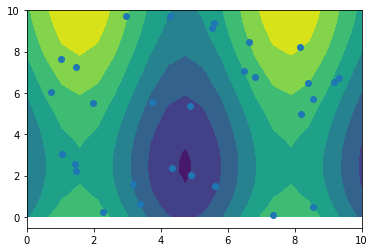

In [3]:
f = lambda x: np.array([np.sin(x[:,0])+0.1*(x[:,1]-2.)**2-0.005*x[:,1]**3]).T
fd = lambda x: np.array([np.cos(x[:,0]), 0.2*(x[:,1]-2.)-0.015*x[:,1]**2]).T
N=30
sigma = 0.05
sigmader = 0.05
x = 10*np.random.random((N,2))
y = f(x) + np.array(sigma*np.random.normal(0,1,(N,1)))
yd = fd(x) + np.array(sigma*np.random.normal(0,1,(N,2)))


v = np.linspace(0,10,20)
xv0, xv1 = np.meshgrid(v, v, sparse=False, indexing='ij')

xt = np.array([xv0.reshape((-1)), xv1.reshape((-1))]).T
yt = f(xt)

pb.contourf(xv0, xv1, yt.reshape((20,20)), title='real function')
pb.scatter(x[:,0], x[:,1])


Name : gp
Objective : -0.123347950195285
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  gp.                      |                 value  |  constraints  |  priors
  mul.rbf.variance         |    1.3388636087639565  |      +ve      |        
  mul.rbf.lengthscale      |    2.0005308906657246  |      +ve      |        
  mul.rbf_1.variance       |    1.3388636087643044  |      +ve      |        
  mul.rbf_1.lengthscale    |     5.488274873861723  |      +ve      |        
  Gaussian_noise.variance  |  0.001844014238294171  |      +ve      |        


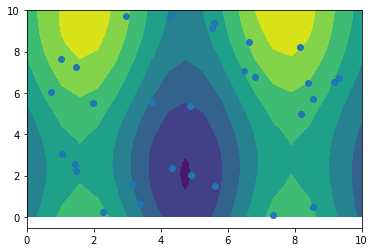

In [4]:
# squared exponential kernel:
se0 = GPy.kern.RBF(input_dim = 1, lengthscale=1.5, variance=0.2, active_dims=[0])
se1 = GPy.kern.RBF(input_dim = 1, lengthscale=1.5, variance=0.2, active_dims=[1])

se = se0 * se1

#Then 
gauss = GPy.likelihoods.Gaussian(variance=sigma**2)

# Then create the model, we give everything in lists, the order of the inputs indicates the order of the outputs
# Now we have the regular observations first and derivative observations second, meaning that the kernels and
# the likelihoods must follow the same order
m = GPy.core.GP(X=x, Y=y, kernel=se, likelihood = gauss)

# Optimize the model
m.optimize(messages=0, ipython_notebook=True)


print(m)



#making predictions for the values:
mu, var = m.predict_noiseless(xt)
pb.contourf(xv0, xv1, mu.reshape((20,20)), title='real function')
pb.scatter(x[:,0], x[:,1])


Name : gp
Objective : -23.89462630045756
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  gp.                                              |                  value  |  constraints  |  priors
  MultioutputDerivativeKern.mul.rbf.variance       |     1.3213011622733712  |      +ve      |        
  MultioutputDerivativeKern.mul.rbf.lengthscale    |     1.6628865666417627  |      +ve      |        
  MultioutputDerivativeKern.mul.rbf_1.variance     |    0.16159319998117488  |      +ve      |        
  MultioutputDerivativeKern.mul.rbf_1.lengthscale  |      1.807433188726254  |      +ve      |        
  multioutput_likelihood.Gaussian_noise.variance   |  0.0025775349360512368  |      +ve      |        


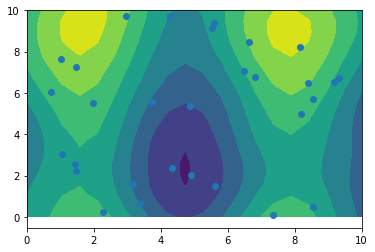

In [5]:
# squared exponential kernel:
se0 = GPy.kern.RBF(input_dim = 1, lengthscale=1.5, variance=0.2, active_dims=[0])
se1 = GPy.kern.RBF(input_dim = 1, lengthscale=1.5, variance=0.2, active_dims=[1])

se = se0 * se1

# We need to generate separate kernel for the derivative observations and give the created kernel as an input:
se_der0 = GPy.kern.DiffKern(se, 0)
se_der1 = GPy.kern.DiffKern(se, 1)

#Then 
gauss = GPy.likelihoods.Gaussian(variance=sigma**2)

# Then create the model, we give everything in lists, the order of the inputs indicates the order of the outputs
# Now we have the regular observations first and derivative observations second, meaning that the kernels and
# the likelihoods must follow the same order
m = GPy.models.MultioutputGP(X_list=[x, x, x], Y_list=[y, np.array([yd[:,0]]).T, np.array([yd[:,1]]).T], kernel_list=[se, se_der0, se_der1], likelihood_list = [gauss, gauss, gauss])

# Optimize the model
m.optimize(messages=0, ipython_notebook=True)


print(m)



#making predictions for the values:
mu, var = m.predict_noiseless(Xnew=[xt])
pb.contourf(xv0, xv1, mu.reshape((20,20)), title='real function')
pb.scatter(x[:,0], x[:,1])


Name : gp
Objective : -58.42154100278999
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  gp.                                                 |                 value  |  constraints  |  priors
  MultioutputDerivativeKern.std_periodic.variance     |    0.6135269766464915  |      +ve      |        
  MultioutputDerivativeKern.std_periodic.period       |                  (2,)  |      +ve      |        
  MultioutputDerivativeKern.std_periodic.lengthscale  |                  (2,)  |      +ve      |        
  multioutput_likelihood.Gaussian_noise.variance      |  0.008604026872497538  |      +ve      |        


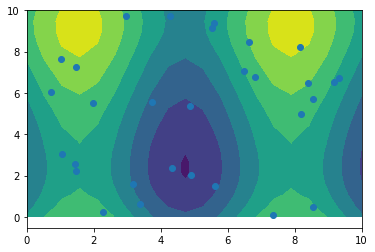

In [6]:
# squared exponential kernel:
se = GPy.kern.StdPeriodic(input_dim=2, lengthscale=[1.5]*2, period=[1.5]*2, variance=0.2, ARD1=True, ARD2=True)

# We need to generate separate kernel for the derivative observations and give the created kernel as an input:
se_der0 = GPy.kern.DiffKern(se, 0)
se_der1 = GPy.kern.DiffKern(se, 1)

#Then 
gauss = GPy.likelihoods.Gaussian(variance=sigma**2)

# Then create the model, we give everything in lists, the order of the inputs indicates the order of the outputs
# Now we have the regular observations first and derivative observations second, meaning that the kernels and
# the likelihoods must follow the same order
m = GPy.models.MultioutputGP(X_list=[x, x, x], Y_list=[y, np.array([yd[:,0]]).T, np.array([yd[:,1]]).T], kernel_list=[se, se_der0, se_der1], likelihood_list = [gauss, gauss, gauss])

# Optimize the model
m.optimize(messages=0, ipython_notebook=True)


print(m)



#making predictions for the values:
mu, var = m.predict_noiseless(Xnew=[xt])
pb.contourf(xv0, xv1, mu.reshape((20,20)), title='real function')
pb.scatter(x[:,0], x[:,1])